In [1]:
import missingno as msno
from pandas_profiling import ProfileReport
import functions as fct
import warnings
import cufflinks as cf
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
py.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
offline.init_notebook_mode()
cf.go_offline()
warnings.simplefilter(action='ignore', category=FutureWarning)



  # Chargement des données

In [2]:
application_train = pd.read_csv('../01_DATA/application_train.csv')
POS_CASH_balance = pd.read_csv('../01_DATA/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('../01_DATA/bureau_balance.csv')
previous_application = pd.read_csv('../01_DATA/previous_application.csv')
installments_payments = pd.read_csv('../01_DATA/installments_payments.csv')
credit_card_balance = pd.read_csv('../01_DATA/credit_card_balance.csv')
bureau = pd.read_csv('../01_DATA/bureau.csv')
application_test = pd.read_csv('../01_DATA/application_test.csv')



In [3]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)



Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [4]:
# profile = ProfileReport(application_train)
# profile.to_file(output_file='rapport_application_train.html')



  # Aperçu des données disponibles

In [5]:
application_train.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
POS_CASH_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [7]:
bureau_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [8]:
previous_application.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
installments_payments.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [10]:
credit_card_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MIN_REGULARITY     3535076 non-null  float64
 10  AMT_PAYMENT_CURRENT         3072324 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   3840312 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    3840312 non-null  float64
 1

In [11]:
bureau.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

  # Target

In [12]:
application_train['TARGET'].value_counts(dropna=False)



0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

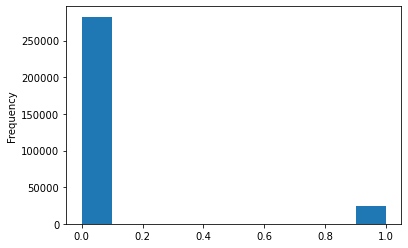

In [13]:
application_train.TARGET.plot.hist()



In [14]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels',
         values='values', title='Loan Repayed or not')



  Les classes cibles sont déséquilibrées : 92% des prêts sont remboursés.

  # Valeurs manquantes

In [15]:
# Function to calculate missing values by column# Funct


def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



  Application_train

Il y a 75.60% valeurs renseignées (soit 24.40 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

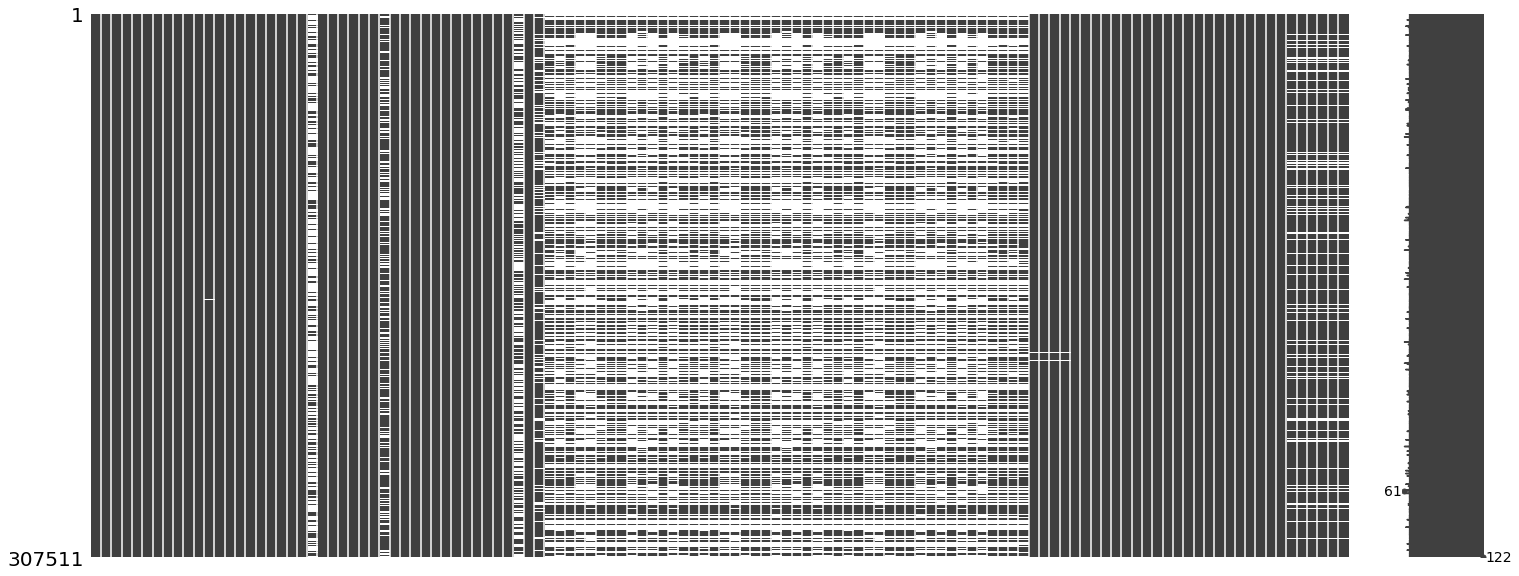

In [16]:
fct.pourcent_NA_df(application_train)
msno.matrix(application_train)
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(20)



  POS_CASH_balance

Il y a 99.93% valeurs renseignées (soit 0.07 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
CNT_INSTALMENT_FUTURE           26087                0.3
CNT_INSTALMENT                  26071                0.3

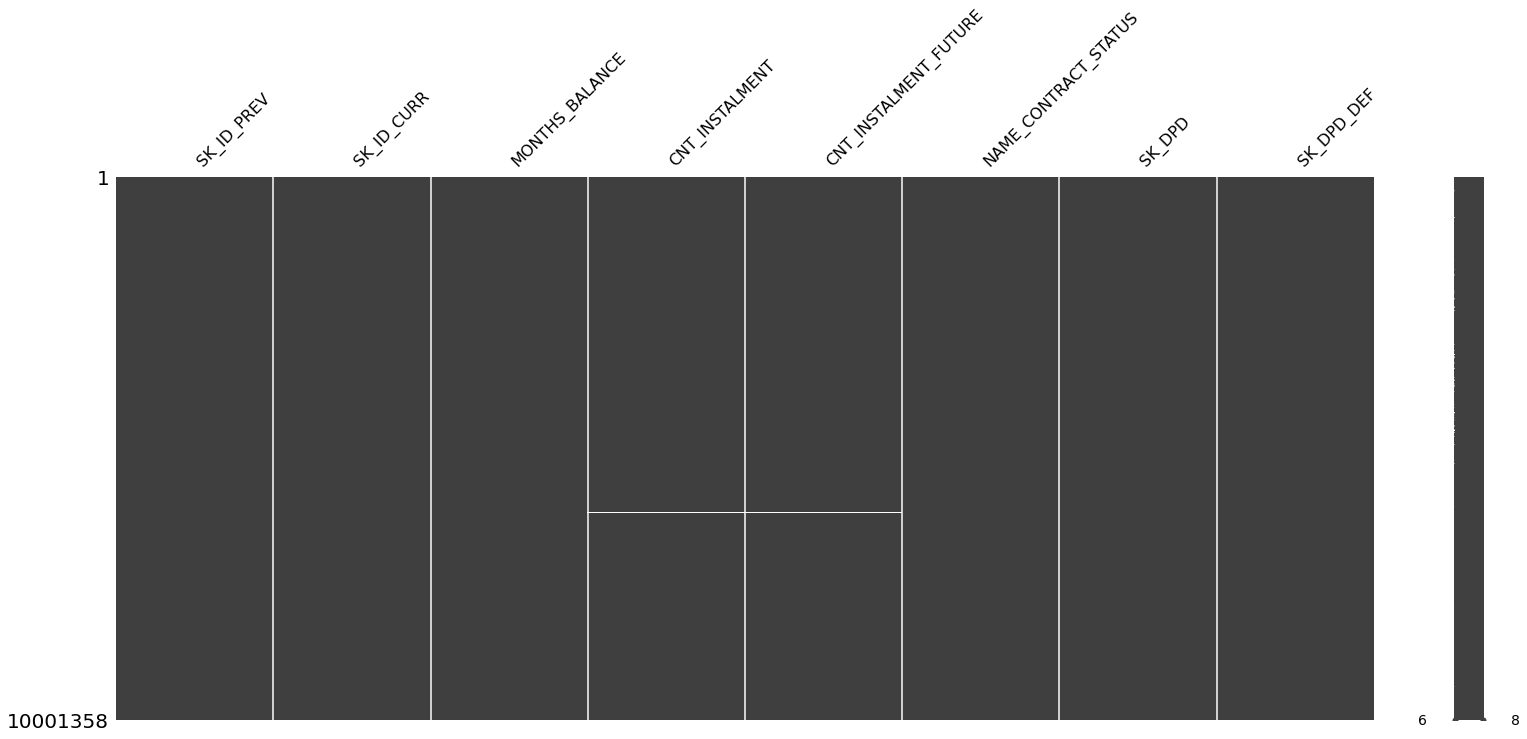

In [17]:
fct.pourcent_NA_df(POS_CASH_balance)
msno.matrix(POS_CASH_balance)
# Missing values statistics
missing_values = missing_values_table(POS_CASH_balance)
missing_values.head(20)



  Bureau_balance

Il y a 100.00% valeurs renseignées (soit 0.00 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

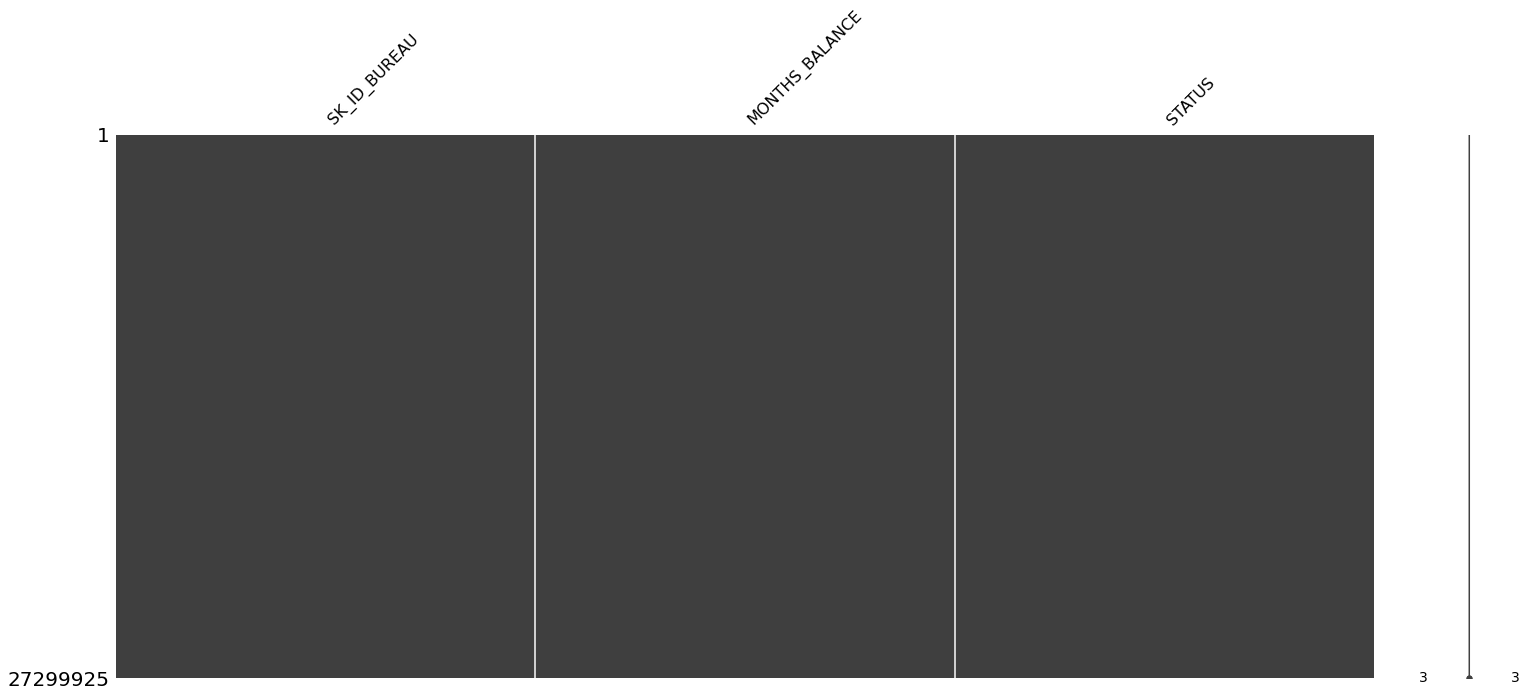

In [18]:
fct.pourcent_NA_df(bureau_balance)
msno.matrix(bureau_balance)
# Missing values statistics
missing_values = missing_values_table(bureau_balance)
missing_values.head(20)



  Previous_application

Il y a 82.02% valeurs renseignées (soit 17.98 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY             1664263               99.6
RATE_INTEREST_PRIVILEGED          1664263               99.6
AMT_DOWN_PAYMENT                   895844               53.6
RATE_DOWN_PAYMENT                  895844               53.6
NAME_TYPE_SUITE                    820405               49.1
DAYS_FIRST_DRAWING                 673065               40.3
DAYS_FIRST_DUE                     673065               40.3
DAYS_LAST_DUE_1ST_VERSION          673065               40.3
DAYS_LAST_DUE                      673065               40.3
DAYS_TERMINATION                   673065               40.3
NFLAG_INSURED_ON_APPROVAL          673065               40.3
AMT_GOODS_PRICE                    385515               23.1
AMT_ANNUITY                        372235               22.3
CNT_PAYMENT                        372230               22.3
PRODUCT_COMBINATION                   346                0.0
AMT_CREDIT                              1                0.0

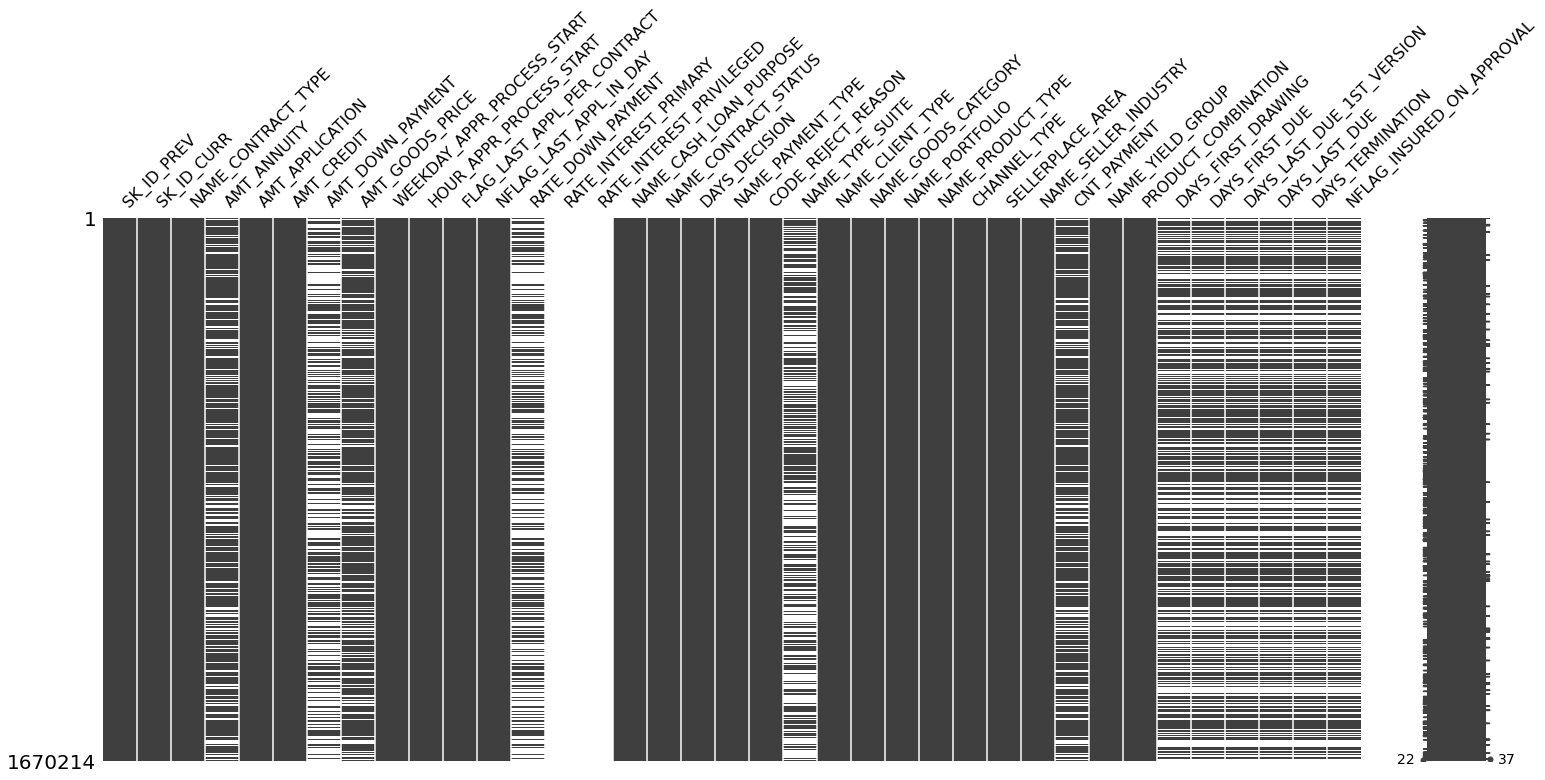

In [19]:
fct.pourcent_NA_df(previous_application)
msno.matrix(previous_application)
# Missing values statistics
missing_values = missing_values_table(previous_application)
missing_values.head(20)



  Installment_payment

Il y a 99.99% valeurs renseignées (soit 0.01 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
DAYS_ENTRY_PAYMENT            2905                0.0
AMT_PAYMENT                   2905                0.0

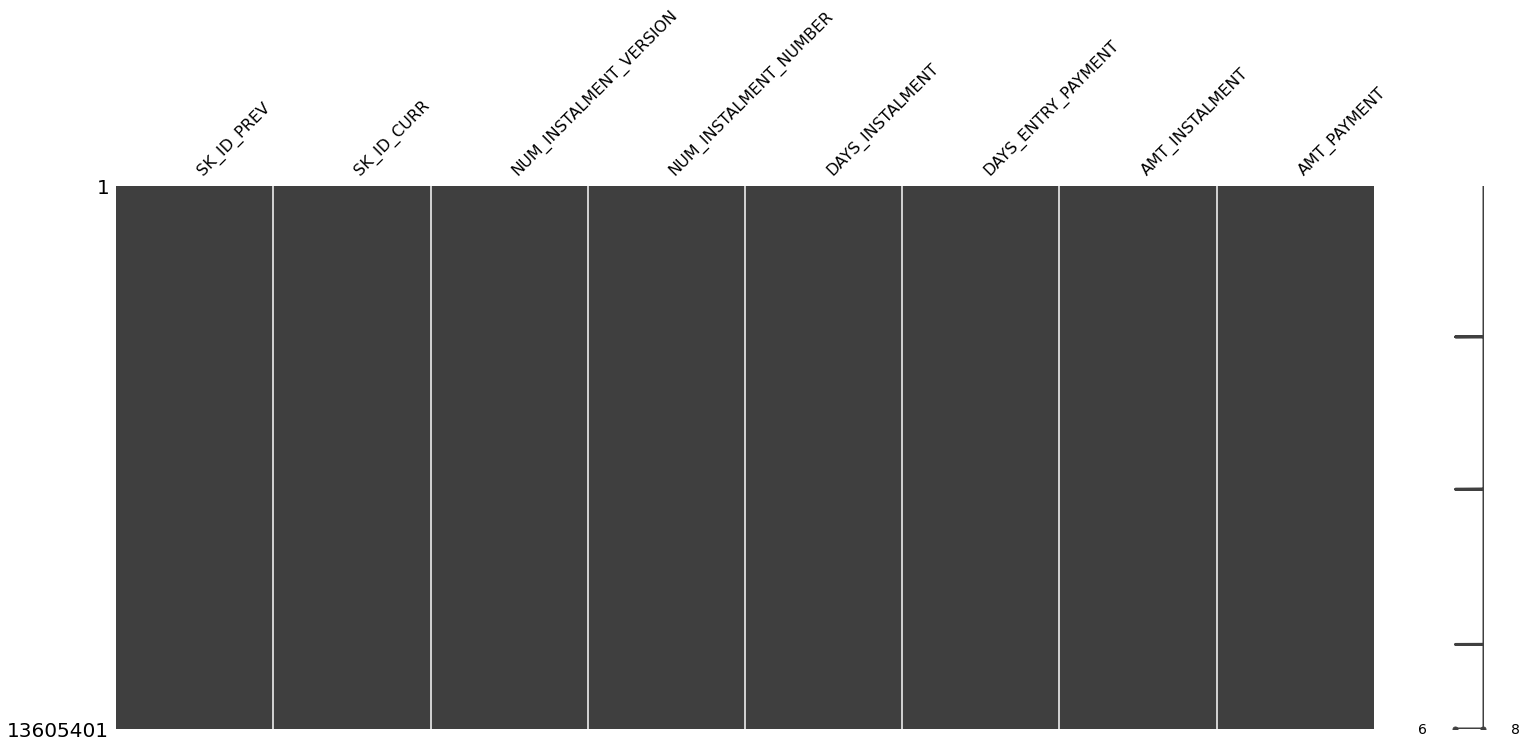

In [20]:
fct.pourcent_NA_df(installments_payments)
msno.matrix(installments_payments)
# Missing values statistics
missing_values = missing_values_table(installments_payments)
missing_values.head(20)



  Credit_balance

Il y a 93.35% valeurs renseignées (soit 6.65 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
AMT_PAYMENT_CURRENT                 767988               20.0
AMT_DRAWINGS_ATM_CURRENT            749816               19.5
AMT_DRAWINGS_OTHER_CURRENT          749816               19.5
AMT_DRAWINGS_POS_CURRENT            749816               19.5
CNT_DRAWINGS_ATM_CURRENT            749816               19.5
CNT_DRAWINGS_OTHER_CURRENT          749816               19.5
CNT_DRAWINGS_POS_CURRENT            749816               19.5
AMT_INST_MIN_REGULARITY             305236                7.9
CNT_INSTALMENT_MATURE_CUM           305236                7.9

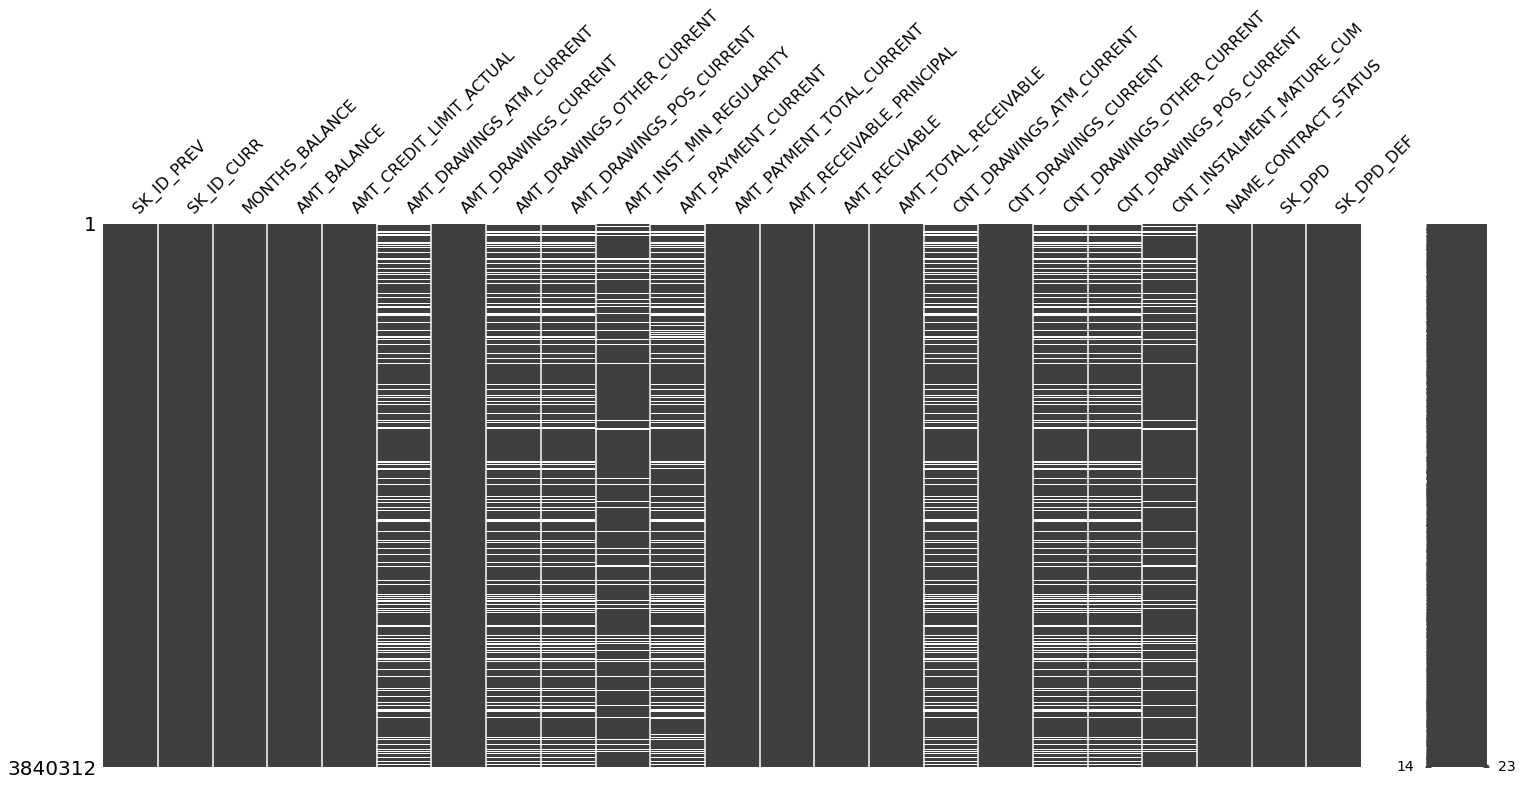

In [21]:
fct.pourcent_NA_df(credit_card_balance)
msno.matrix(credit_card_balance)
# Missing values statistics
missing_values = missing_values_table(credit_card_balance)
missing_values.head(20)



  bureau

Il y a 86.50% valeurs renseignées (soit 13.50 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                    1226791               71.5
AMT_CREDIT_MAX_OVERDUE         1124488               65.5
DAYS_ENDDATE_FACT               633653               36.9
AMT_CREDIT_SUM_LIMIT            591780               34.5
AMT_CREDIT_SUM_DEBT             257669               15.0
DAYS_CREDIT_ENDDATE             105553                6.1
AMT_CREDIT_SUM                      13                0.0

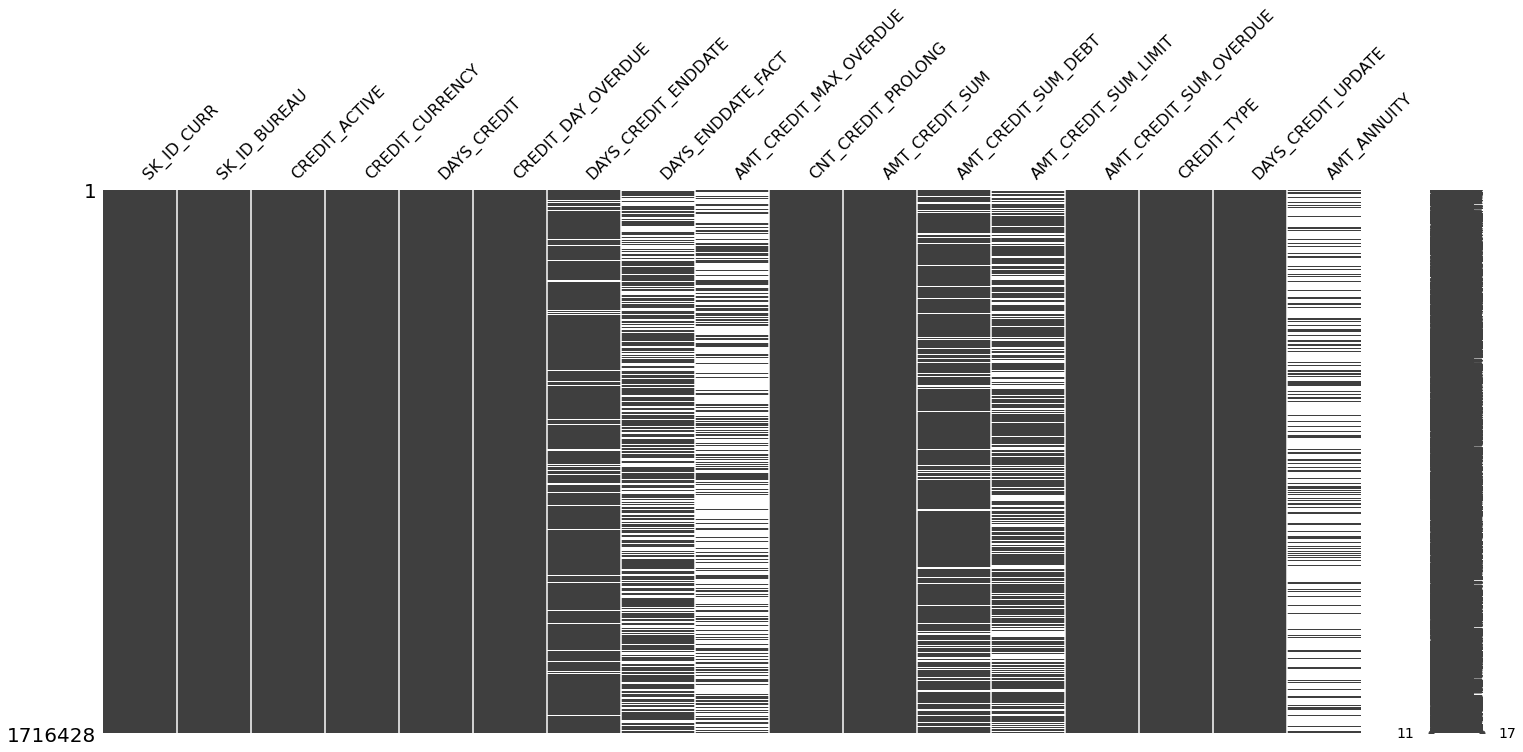

In [22]:
fct.pourcent_NA_df(bureau)
msno.matrix(bureau)
# Missing values statistics
missing_values = missing_values_table(bureau)
missing_values.head(20)



  Pour le moment on ne peut pas savoir si ces colonnes sont importantes pour la suite de l'étude. Je les garde donc pour le moment.

  # Type de colonnes

In [23]:
# Number of each type of column
application_train.dtypes.value_counts()



float64    65
int64      41
object     16
dtype: int64

In [24]:
# nombre d'entrées différentes pour les colonnes 'object'
application_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)



NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

  La plupart des colonnes catégorielles ne présentent pas beaucoup de valeurs différentes (cardinalité faible, sauf pour les colonnes occupation_type et organisation_type).

  Les colonnes présentant 2 valeurs pourront être transformées avec un label_encoder (4 colonnes), les autres pourront être transformées via un one hot encoder.

  # Data exploration
  ## données catégorielles

In [25]:
col_obj = list(application_train.select_dtypes('object').columns)
for col in col_obj:
    print('-'*10)
    print(col)
    print(application_train[col].value_counts(dropna=False))


----------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
----------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------
NAME_EDUCATION_TYPE

 code gender : 4 code XNA qui doivent correspondrent à NaN

 ORGANIZATION_TYPE : 55353 code XNA

 ## variables DAYS
  ### days_birth

In [26]:
(application_train['DAYS_BIRTH'] / -365).describe()



count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

  Pas d'anomalie sur l'age des personnes ayant candidaté pour un pret
  ### Days_employed

In [27]:
(application_train.DAYS_EMPLOYED / -365).describe()



count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

  Probleme avec la valeur min qui représente 1000 ans...

Text(0.5, 0, 'Days Employment')

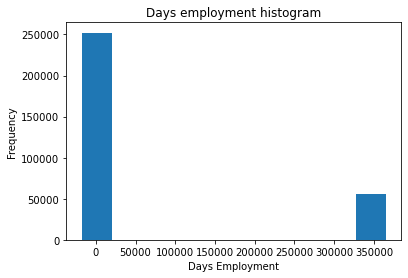

In [28]:
application_train.DAYS_EMPLOYED.plot.hist(title='Days employment histogram')
plt.xlabel('Days Employment')



In [29]:
application_train.DAYS_EMPLOYED.value_counts()



 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

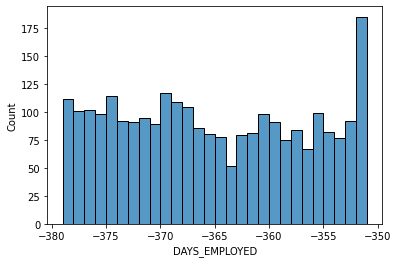

In [30]:
temp = application_train[(application_train.DAYS_EMPLOYED < -350)
                         & (application_train.DAYS_EMPLOYED > -380)]

sns.histplot(data=temp, x='DAYS_EMPLOYED', bins=28)



  Cette anomalie est présente pour 55374 clients et prend systématiquement la même valeur 365243 (qui ressemble au nombre de jours dans une année, en oubliant la virgule : 365.243). Regardons plus en détail la répartition de cette anomalie en fonction de la target

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

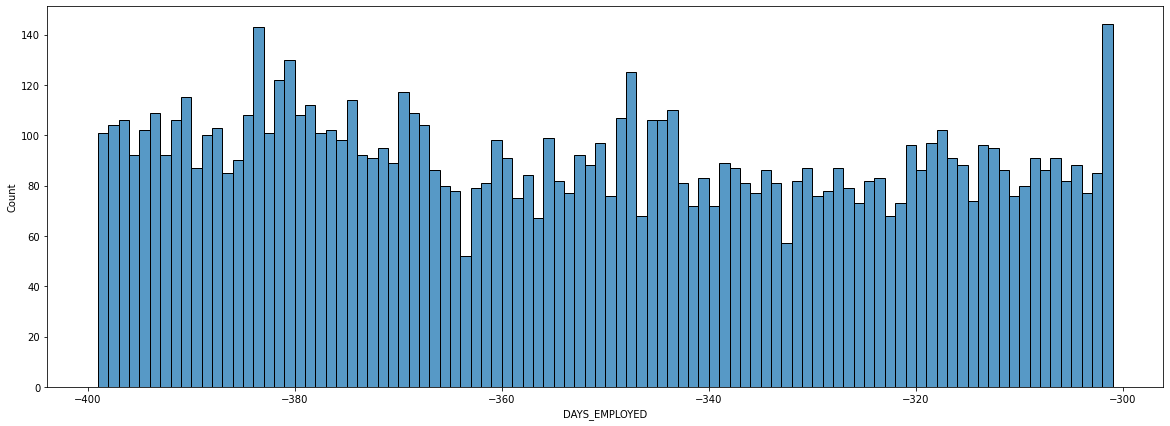

In [31]:
temp = application_train[(application_train.DAYS_EMPLOYED < -300)
                         & (application_train.DAYS_EMPLOYED > -400)]
plt.figure(figsize=(20, 7))
sns.histplot(data=temp, x='DAYS_EMPLOYED', bins=98)



In [32]:
masque = (application_train.DAYS_EMPLOYED == 365243)
anomalie = application_train[masque]
non_anomalie = application_train[~masque]
refus_anomalies = 100 * anomalie.TARGET.mean()
refus_non_anomalies = 100 * non_anomalie.TARGET.mean()
print('{:.2f} % des clients ayant un pb sur la durée de'.format(refus_anomalies),
      'travail présentent un refus de prêt')
print('{:.2f} % des clients ayant une durée de'.format(refus_non_anomalies),
      'travail normale présentent un refus de prêt')



5.40 % des clients ayant un pb sur la durée de travail présentent un refus de prêt
8.66 % des clients ayant une durée de travail normale présentent un refus de prêt


  Les clients présentant une anomalie sur leur durée d'emplois présentent moins de refus de prêt.

  Comme la valeur de cette anomalie est constante (days_employed = 365243), je vais garder l'information de cete anomalie au cas où elle corresponde à une autre information.

Text(0.5, 0, 'Days Employment')

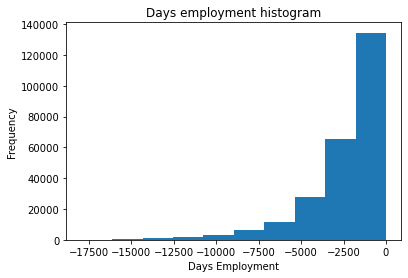

In [33]:
# creation d'une colonne pour stocker l'info anomalie / non  anomalie
application_train['DAYS_EMPLOYED_ANOM'] = masque

# remplacement des valeurs anormales par np.NaN
application_train.DAYS_EMPLOYED.replace({365243: np.nan}, inplace=True)

application_train.DAYS_EMPLOYED.plot.hist(title='Days employment histogram')
plt.xlabel('Days Employment')



  La distribution est plus cohérente avec ce qui est attendu.

  ### Days_id_publish

In [34]:
(application_train.DAYS_ID_PUBLISH / -365).describe()



count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

Text(0.5, 0, 'Days ID published')

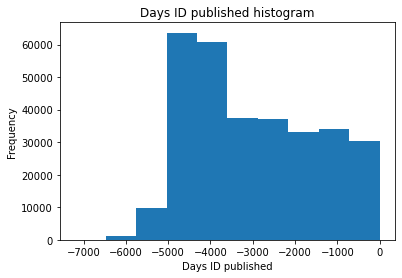

In [35]:
application_train.DAYS_ID_PUBLISH.plot.hist(
    title='Days ID published histogram')
plt.xlabel('Days ID published')



  pas de soucis

  ### Days_last_phone_change

In [36]:
(application_train.DAYS_LAST_PHONE_CHANGE / -365).describe()



count    307510.000000
mean          2.637969
std           2.265229
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Text(0.5, 0, 'Days last phone change')

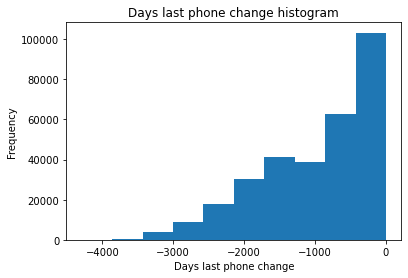

In [37]:
application_train.DAYS_LAST_PHONE_CHANGE.plot.hist(
    title='Days last phone change histogram')
plt.xlabel('Days last phone change')



  Pas de soucis

  ### Days_registration

In [38]:
(application_train.DAYS_REGISTRATION / -365).describe()



count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

Text(0.5, 0, 'Days registration')

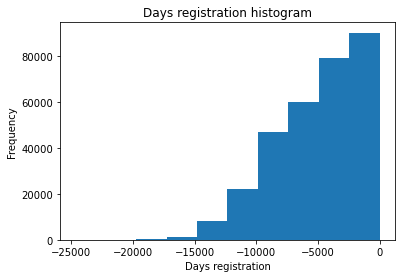

In [39]:
application_train.DAYS_REGISTRATION.plot.hist(
    title='Days registration histogram')
plt.xlabel('Days registration')



  Quelques outliers probables au delà de 20000 jours (soit 54 ans)

In [40]:
masque = (application_train.DAYS_REGISTRATION < -20000)
print("Il y a {} lignes présentant une valeur de".format(masque.sum()),
      "days_registration < -20 000")
anomalie = application_train[masque]
non_anomalie = application_train[~masque]
refus_anomalies = 100 * anomalie.TARGET.mean()
refus_non_anomalies = 100 * non_anomalie.TARGET.mean()
print('{:.2f} % des clients ayant un pb sur days_registration'.format(refus_anomalies),
      'présentent un refus de prêt')
print("{:.2f} % des clients n'ayant pas de pb sur days_registration".format(refus_non_anomalies),
      'présentent un refus de prêt')



Il y a 30 lignes présentant une valeur de days_registration < -20 000
3.33 % des clients ayant un pb sur days_registration présentent un refus de prêt
8.07 % des clients n'ayant pas de pb sur days_registration présentent un refus de prêt


In [41]:
application_train[masque]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2680        103127       0         Cash loans           F            N   
21990       125615       0         Cash loans           F            N   
27531       132001       0         Cash loans           M            Y   
33939       139334       0         Cash loans           F            N   
41442       147977       0         Cash loans           F            N   
44824       151922       0         Cash loans           M            N   
45121       152267       0         Cash loans           F            N   
68403       179339       0         Cash loans           F            N   
75227       187243       0         Cash loans           F            Y   
93123       208132       0         Cash loans           F            N   
94098       209270       0         Cash loans           M            Y   
95342       210692       0         Cash loans           F            N   
129516      250222       0         Cash loans           F            Y   
147595      271138       0         Cash loans           F            N   
151533      275649       0         Cash loans           F            N   
153731      278175       0         Cash loans           F            N   
161470      287188       0         Cash loans           F            N   
163628      289681       0         Cash loans           F            N   
189491      319706       0         Cash loans           M            Y   
194676      325731       0         Cash loans           M            N   
210943      344459       0         Cash loans           F            N   
213929      347901       0         Cash loans           F            Y   
221818      356957       0         Cash loans           F            N   
234093      371157       0         Cash loans           F            N   
249436      388601       0         Cash loans           M            N   
269250      412034       0         Cash loans           F            N   
282370      427020       0         Cash loans           M            N   
289176      435011       1         Cash loans           F            N   
298429      445726       0         Cash loans           F            N   
299743      447254       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
2680                 N             0          135000.0    479700.0   
21990                Y             0           39600.0    283585.5   
27531                Y             0          405000.0   1345500.0   
33939                Y             0          117000.0    728460.0   
41442                Y             0          135000.0   1125000.0   
44824                N             0          112500.0    609187.5   
45121                N             0          112500.0    630000.0   
68403                Y             0          157500.0    760500.0   
75227                Y             0          315000.0     45000.0   
93123                Y             0          214200.0   1515415.5   
94098                Y             0          126000.0    808650.0   
95342                Y             0          112500.0    733500.0   
129516               Y             0          112500.0    180000.0   
147595               N             0           68400.0    634482.0   
151533               Y             0          180000.0    247500.0   
153731               Y             0          225000.0   1032133.5   
161470               N             1           72000.0    229230.0   
163628               Y             0           99000.0    654498.0   
189491               Y             0           81000.0    808650.0   
194676               Y             0          103500.0    622188.0   
210943               Y             0          180000.0   1350000.0   
213929               Y             0          112500.0    555273.0   
221818               Y             0          202500.0    432661.5   
234093               Y           

  Les clients présentant une anomalie sur days_registration présentent moins de refus de prêt.

  Je vais garder l'information de cete anomalie au cas où elle corresponde à une autre information.

Text(0.5, 0, 'Days registration')

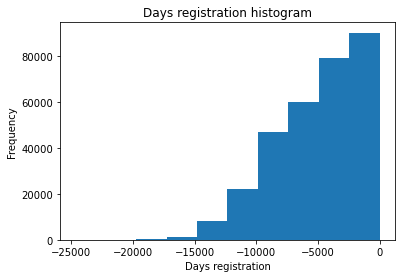

In [42]:
# creation d'une colonne pour stocker l'info anomalie / non  anomalie
application_train['DAYS_REGISTRATION_ANOM'] = masque

# remplacement des valeurs anormales par np.NaN
application_train[masque].DAYS_REGISTRATION = np.nan

application_train.DAYS_REGISTRATION.plot.hist(
    title='Days registration histogram')
plt.xlabel('Days registration')



  ## Distribution des variables quantitatives
  ### AMT_CREDIT

Text(0.5, 1.0, 'Distribution of AMT_CREDIT')

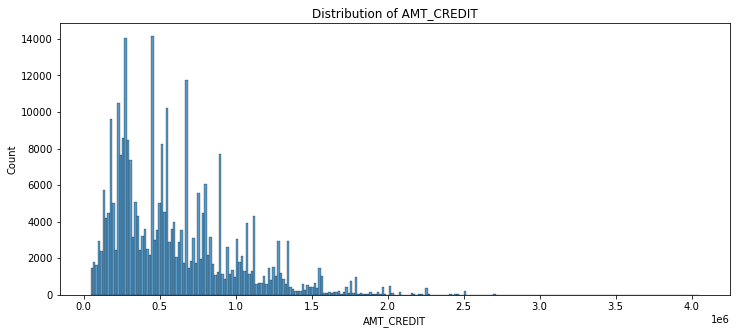

In [43]:
plt.figure(figsize=(12, 5))
ax = sns.histplot(application_train["AMT_CREDIT"])
plt.title("Distribution of AMT_CREDIT")



  ### AMT_INCOME_TOTAL

Text(0.5, 1.0, 'Distribution of AMT_INCOME_TOTAL')

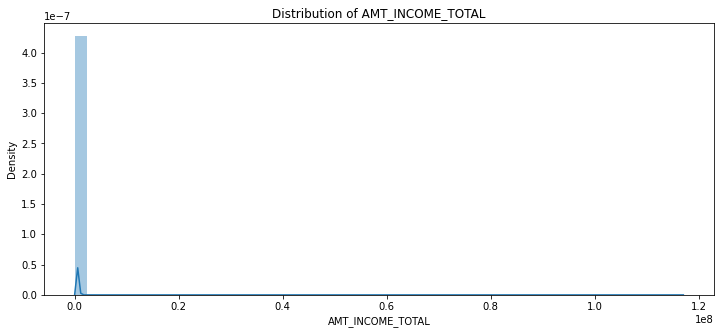

In [44]:
plt.figure(figsize=(12, 5))

ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())
plt.title("Distribution of AMT_INCOME_TOTAL")



  ### AMT_GOODS_PRICE

Text(0.5, 1.0, 'Distribution of AMT_GOODS_PRICE')

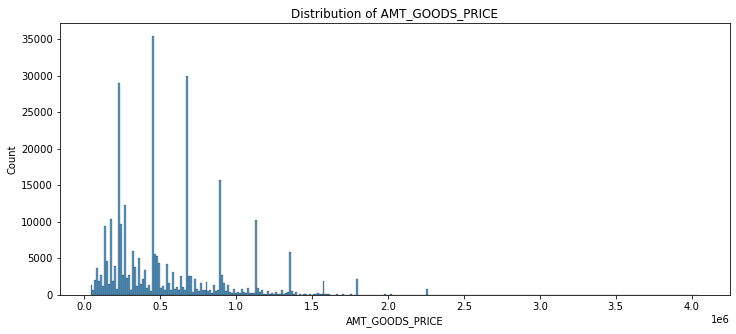

In [45]:
plt.figure(figsize=(12, 5))

ax = sns.histplot(application_train["AMT_GOODS_PRICE"].dropna())
plt.title("Distribution of AMT_GOODS_PRICE")



  ### NAME_TYPE_SUITE : personne qui accompagne le demandeur

In [46]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x=temp.index,
    y=(temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title="Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')



  ### NAME_CONTRACT_TYPE : type de prêt

In [47]:
temp = application_train["NAME_CONTRACT_TYPE"].value_counts()
fig = {
    "data": [
      {
          "values": temp.values,
          "labels": temp.index,
          "domain": {"x": [0, .48]},
          # "name": "Types of Loans",
          # "hoverinfo":"label+percent+name",
          "hole": .7,
          "type": "pie"
      },

    ],
    "layout": {
        "title": "Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')



  ### Possession de voiture / maison

In [48]:
temp1 = application_train["FLAG_OWN_CAR"].value_counts()
temp2 = application_train["FLAG_OWN_REALTY"].value_counts()

fig = {
    "data": [
      {
          "values": temp1.values,
          "labels": temp1.index,
          "domain": {"x": [0, .48]},
          "name": "Own Car",
          "hoverinfo":"label+percent+name",
          "hole": .6,
          "type": "pie"
      },
        {
          "values": temp2.values,
          "labels": temp2.index,
          # "text":"Own Realty",
          "textposition": "inside",
          "domain": {"x": [.52, 1]},
          "name": "Own Reality",
          "hoverinfo":"label+percent+name",
          "hole": .6,
          "type": "pie"
      }],
    "layout": {
        "title": "What applicant own",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Car",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Realty",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')



  ### Source de revenu

In [49]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Income sources of Applicant\'s', hole=0.5)



  ### Statut familial

In [50]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Family Status of Applicant\'s', hole=0.5)



  ### Profession

In [51]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle='Occupation', yTitle="Count",
           title='Occupation of Applicant\'s who applied for loan', color='green')



  ### niveau d'études

In [52]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Education of Applicant\'s', hole=0.5)



  ### Lieu de résidence

In [53]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Type of House', hole=0.5)



  ### Secteur d'emplois

In [54]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle='Organization Name', yTitle="Count",
           title='Types of Organizations who applied for loan ', color='red')



  ## Exploration en fonction de la target
  ### Revenus

In [55]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la source de revenu",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



[9.588471664126368, 7.484256531270509, 5.386366099490625, 5.754964751416855, 36.36363636363637, 0.0, 0.0, 40.0]


  ### Statut familial

In [56]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du statut familial",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  ### Profession

In [57]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la profession",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  ### Niveau d'étude

In [58]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la profession",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  ### lieu de résidence

In [59]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du lieu d'habitation",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  ### Secteur d'emplois

In [60]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du secteur d'emplois",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  ### Accompagnant du demandeur de prêt

In [61]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de l'accompagnant du demandeur",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



  # Previous application : data exploration

In [62]:
nb_pret = len(previous_application.SK_ID_CURR.unique())
nb_pret_tot = len(application_train.SK_ID_CURR.unique()) + \
    len(application_test.SK_ID_CURR.unique())
print("{} pret en cours on été fait par des personnes ayant".format(nb_pret),
      "déjà fait une demande de prêt par le passé",
      " Soit {:.2f} % des prêts en cours".format(100*nb_pret/nb_pret_tot))



338857 pret en cours on été fait par des personnes ayant déjà fait une demande de prêt par le passé  Soit 95.12 % des prêts en cours


  ## Type de contrats précédemment contractés

In [63]:
temp = previous_application["NAME_CONTRACT_TYPE"].value_counts()
fig = {
    "data": [
      {
          "values": temp.values,
          "labels": temp.index,
          "domain": {"x": [0, .48]},
          # "name": "Types of Loans",
          # "hoverinfo":"label+percent+name",
          "hole": .7,
          "type": "pie"
      },

    ],
    "layout": {
        "title": "Contract product type of previous application",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Contract product type",
                "x": 0.12,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')



  ## Utilisation du prêt

In [64]:
temp = previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x=temp.index,
    y=(temp / temp.sum())*100,
    marker=dict(
        color=(temp / temp.sum())*100,
        colorscale='Blues',
        reversescale=True
    ),
)
data = [trace]
layout = go.Layout(
    title="Purpose of cash loan in previous application in % ",
    xaxis=dict(
        title='Purpose of cash loan',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



  Information globalement peu communiquée (hyp : XAP et XNA correspondent à NaN)

  ## Statut des demandes précédentes

In [65]:
temp = previous_application["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Contract approved or not', hole=0.5)



  ## Type de rembourement choisi par le demandeur

In [66]:
temp = previous_application["NAME_PAYMENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Payment method that client choose to pay for the previous application', hole=0.7, colors=['#75e575', '#ea7c96', ])



  ## Raisons du refus

In [67]:
temp = previous_application["CODE_REJECT_REASON"].value_counts()
temp.iplot(kind='bar', xTitle='Reason', yTitle="Count",
           title='Top reasons of previous application rejection(Wriiten in some codes)', colors=['#75e575'])



  ## demande d'assurance pour un prêt précédent

In [68]:
temp = previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Did the client requested insurance during the previous application(YES : 1, NO : 0)', hole=0.7, colors=['#ea7c96', '#75e575', ])



  # Correlation de pearson

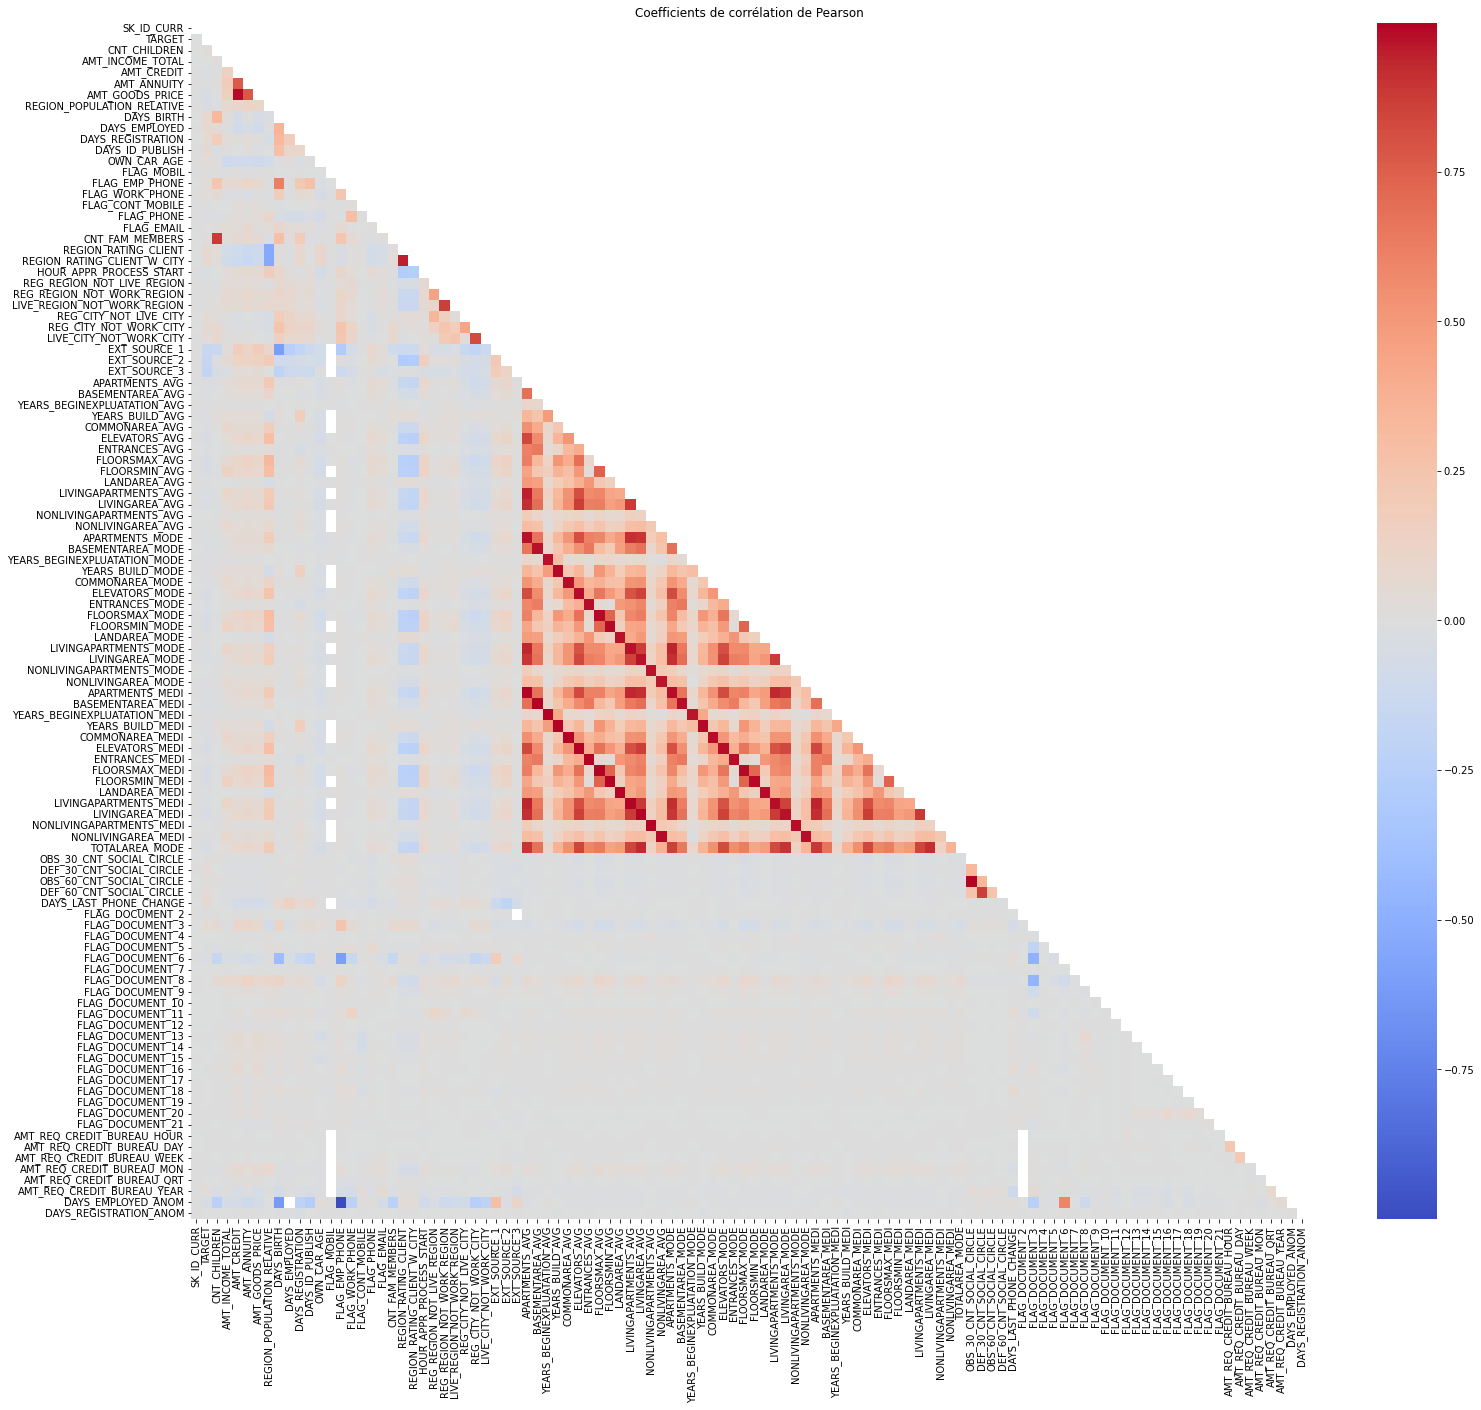

In [69]:
# calcul de la matrice de corrélation et visualisation sous forme de heatmap
corr = application_train.corr()
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# graph
fig = plt.figure(figsize=(25, 22))
sns.heatmap(data=corr, mask=mask, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()



  Des variables semblent corrélées entre elles (variables qui correspondent à des valeurs midi, mini, mode, avg de mêmes variables)

In [70]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))



Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


  Les correlations positive avec la target sont très faibles (max = 0.08). Par contre les corrélation négatives présentent des valeurs un peu plus élevées (-0.18)
  ## Days_BIRTH vs TARGET

In [71]:
# Age information into a separate dataframe
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(
    age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)



TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1       -9461    25.920548  (25.0, 30.0]
1       0      -16765    45.931507  (45.0, 50.0]
2       0      -19046    52.180822  (50.0, 55.0]
3       0      -19005    52.068493  (50.0, 55.0]
4       0      -19932    54.608219  (50.0, 55.0]
5       0      -16941    46.413699  (45.0, 50.0]
6       0      -13778    37.747945  (35.0, 40.0]
7       0      -18850    51.643836  (50.0, 55.0]
8       0      -20099    55.065753  (55.0, 60.0]
9       0      -14469    39.641096  (35.0, 40.0]

In [72]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups



TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036  -8532.795625    23.377522
(25.0, 30.0]  0.111436 -10155.219250    27.822518
(30.0, 35.0]  0.102814 -11854.848377    32.479037
(35.0, 40.0]  0.089414 -13707.908253    37.555913
(40.0, 45.0]  0.078491 -15497.661233    42.459346
(45.0, 50.0]  0.074171 -17323.900441    47.462741
(50.0, 55.0]  0.066968 -19196.494791    52.593136
(55.0, 60.0]  0.055314 -20984.262742    57.491131
(60.0, 65.0]  0.052737 -22780.547460    62.412459
(65.0, 70.0]  0.037270 -24292.614340    66.555108

Text(0.5, 1.0, 'Failure to Repay by Age Group')

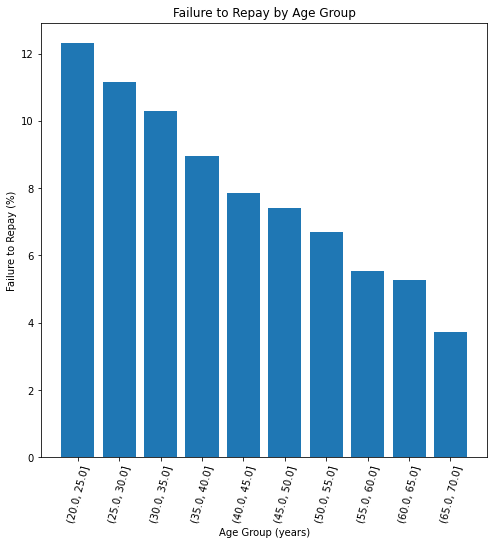

In [73]:
plt.figure(figsize=(8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')



  plus un demandeur est jeune plus il risque de ne pas réussir à rembourser son prêt
  ## EXT_SOURCE vs TARGET

In [74]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1',
                              'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs



TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

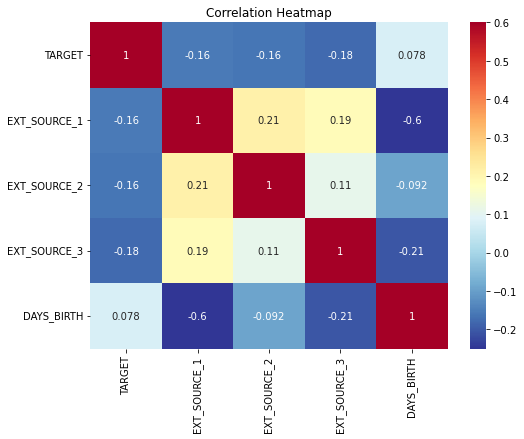

In [75]:
plt.figure(figsize=(8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r,
            vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')



  Plus la valeur de ext_source augmente, plus le client est susceptible de rembourser le prêt

 # Nettoyage et création de features

In [76]:
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


 ## Application_train

In [77]:
# Remove 4 applications with XNA CODE_GENDER
print(application_train.shape)
application_train = application_train[application_train['CODE_GENDER'] != 'XNA']
print(application_train.shape)


(307511, 124)
(307507, 124)


In [78]:
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'DAYS_EMPLOYED_ANOM', 'DAYS_REGISTRATION_ANOM']:
    print(bin_feature)
    print(application_train[bin_feature].unique())
    print(application_train[bin_feature].value_counts(dropna=False))
    application_train[bin_feature], uniques = pd.factorize(
        application_train[bin_feature])
    print(application_train[bin_feature].unique())
    print(application_train[bin_feature].value_counts(dropna=False))


CODE_GENDER
['M' 'F']
F    202448
M    105059
Name: CODE_GENDER, dtype: int64
[0 1]
1    202448
0    105059
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR
['N' 'Y']
N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64
[0 1]
0    202922
1    104585
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY
['Y' 'N']
Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
[0 1]
0    213308
1     94199
Name: FLAG_OWN_REALTY, dtype: int64
DAYS_EMPLOYED_ANOM
[False  True]
False    252133
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64
[0 1]
0    252133
1     55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64
DAYS_REGISTRATION_ANOM
[False  True]
False    307477
True         30
Name: DAYS_REGISTRATION_ANOM, dtype: int64
[0 1]
0    307477
1        30
Name: DAYS_REGISTRATION_ANOM, dtype: int64


In [79]:
# Categorical features with One-Hot encode
application_train, cat_cols = one_hot_encoder(
    application_train, nan_as_category=False)

# Some simple new features (percentages)
application_train['DAYS_EMPLOYED_PERC'] = application_train['DAYS_EMPLOYED'] / \
    application_train['DAYS_BIRTH']
application_train['INCOME_CREDIT_PERC'] = application_train['AMT_INCOME_TOTAL'] / \
    application_train['AMT_CREDIT']
application_train['INCOME_PER_PERSON'] = application_train['AMT_INCOME_TOTAL'] / \
    application_train['CNT_FAM_MEMBERS']
application_train['ANNUITY_INCOME_PERC'] = application_train['AMT_ANNUITY'] / \
    application_train['AMT_INCOME_TOTAL']
application_train['PAYMENT_RATE'] = application_train['AMT_ANNUITY'] / \
    application_train['AMT_CREDIT']


 ## Bureau_balance & bureau

In [80]:
nan_as_category = True
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
bureau_balance, bureau_balance_cat = one_hot_encoder(
    bureau_balance, nan_as_category)
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 40 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   SK_ID_CURR                                                int64  
 1   SK_ID_BUREAU                                              int64  
 2   DAYS_CREDIT                                               int64  
 3   CREDIT_DAY_OVERDUE                                        int64  
 4   DAYS_CREDIT_ENDDATE                                       float64
 5   DAYS_ENDDATE_FACT                                         float64
 6   AMT_CREDIT_MAX_OVERDUE                                    float64
 7   CNT_CREDIT_PROLONG                                        int64  
 8   AMT_CREDIT_SUM                                            float64
 9   AMT_CREDIT_SUM_DEBT                                       float64
 10  AMT_CREDIT_SUM_LIMIT          

In [81]:
bureau_balance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 11 columns):
 #   Column          Dtype
---  ------          -----
 0   SK_ID_BUREAU    int64
 1   MONTHS_BALANCE  int64
 2   STATUS_0        uint8
 3   STATUS_1        uint8
 4   STATUS_2        uint8
 5   STATUS_3        uint8
 6   STATUS_4        uint8
 7   STATUS_5        uint8
 8   STATUS_C        uint8
 9   STATUS_X        uint8
 10  STATUS_nan      uint8
dtypes: int64(2), uint8(9)
memory usage: 650.9 MB


In [82]:
# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for col in bureau_balance_cat:
    bb_aggregations[col] = ['mean']
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper()
                           for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace=True)
bureau


SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0            215354         -497                   0               -153.0   
1            215354         -208                   0               1075.0   
2            215354         -203                   0                528.0   
3            215354         -203                   0                  NaN   
4            215354         -629                   0               1197.0   
...             ...          ...                 ...                  ...   
1716423      259355          -44                   0                -30.0   
1716424      100044        -2648                   0              -2433.0   
1716425      100044        -1809                   0              -1628.0   
1716426      246829        -1878                   0              -1513.0   
1716427      246829         -463                   0                  NaN   

         DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
0                   -153.0                     NaN                   0   
1                      NaN                     NaN                   0   
2                      NaN                     NaN                   0   
3                      NaN                     NaN                   0   
4                      NaN                 77674.5                   0   
...                    ...                     ...                 ...   
1716423                NaN                     0.0                   0   
1716424            -2493.0                  5476.5                   0   
1716425             -970.0                     NaN                   0   
1716426            -1513.0                     NaN                   0   
1716427             -387.0                     NaN                   0   

         AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  ...  \
0              91323.00                  0.0                   NaN  ...   
1             225000.00             171342.0                   NaN  ...   
2             464323.50                  NaN                   NaN  ...   
3              90000.00                  NaN                   NaN  ...   
4            2700000.00                  NaN                   NaN  ...   
...                 ...                  ...                   ...  ...   
1716423        11250.00              11250.0                   0.0  ...   
1716424        38130.84                  0.0                   0.0  ...   
1716425        15570.00                  NaN                   NaN  ...   
1716426        36000.00                  0.0                   0.0  ...   
1716427        22500.00                  0.0                   NaN  ...   

         MONTHS_BALANCE_SIZE  STATUS_0_MEAN  STATUS_1_MEAN  STATUS_2_MEAN  \
0                        NaN            NaN            NaN            NaN   
1                        NaN            NaN            NaN            NaN   
2                        NaN            NaN            NaN            NaN   
3                        NaN            NaN            NaN            NaN   
4                        NaN            NaN            NaN            NaN   
...                      ...            ...            ...            ...   
1716423                  NaN            NaN            NaN            NaN   
1716424                  NaN            NaN            NaN            NaN   
1716425                  NaN            NaN            NaN            NaN   
1716426                  NaN            NaN            NaN            NaN   
1716427                  NaN            NaN            NaN            NaN   

         STATUS_3_MEAN  STATUS_4_MEAN  STATUS_5_MEAN  STATUS_C_MEAN  \
0                  NaN            NaN            NaN            NaN   
1                  NaN            NaN            NaN            NaN   
2                  NaN            NaN            NaN            NaN   
3                  NaN            NaN            NaN            NaN   
4             

In [83]:
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 51 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   SK_ID_CURR                                                int64  
 1   DAYS_CREDIT                                               int64  
 2   CREDIT_DAY_OVERDUE                                        int64  
 3   DAYS_CREDIT_ENDDATE                                       float64
 4   DAYS_ENDDATE_FACT                                         float64
 5   AMT_CREDIT_MAX_OVERDUE                                    float64
 6   CNT_CREDIT_PROLONG                                        int64  
 7   AMT_CREDIT_SUM                                            float64
 8   AMT_CREDIT_SUM_DEBT                                       float64
 9   AMT_CREDIT_SUM_LIMIT                                      float64
 10  AMT_CREDIT_SUM_OVERDUE        

In [84]:
# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}


In [85]:
# Bureau and bureau_balance categorical features
cat_aggregations = {}
for cat in bureau_cat:
    cat_aggregations[cat] = ['mean']
for cat in bureau_balance_cat:
    cat_aggregations[cat + "_MEAN"] = ['mean']
bureau_agg = bureau.groupby('SK_ID_CURR').agg(
    {**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(
    ['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
bureau_agg


BURO_DAYS_CREDIT_MIN  BURO_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_MEAN  \
SK_ID_CURR                                                                      
100001                     -1572                   -49            -735.000000   
100002                     -1437                  -103            -874.000000   
100003                     -2586                  -606           -1400.750000   
100004                     -1326                  -408            -867.000000   
100005                      -373                   -62            -190.666667   
...                          ...                   ...                    ...   
456249                     -2713                  -483           -1667.076923   
456250                     -1002                  -760            -862.000000   
456253                      -919                  -713            -867.500000   
456254                     -1104                 -1104           -1104.000000   
456255                     -2337                  -363           -1089.454545   

            BURO_DAYS_CREDIT_VAR  BURO_DAYS_CREDIT_ENDDATE_MIN  \
SK_ID_CURR                                                       
100001             240043.666667                       -1329.0   
100002             186150.000000                       -1072.0   
100003             827783.583333                       -2434.0   
100004             421362.000000                        -595.0   
100005              26340.333333                        -128.0   
...                          ...                           ...   
456249             407302.243590                       -2499.0   
456250              15724.000000                        -272.0   
456253              10609.000000                        -189.0   
456254                       NaN                        -859.0   
456255             502786.672727                       -1243.0   

            BURO_DAYS_CREDIT_ENDDATE_MAX  BURO_DAYS_CREDIT_ENDDATE_MEAN  \
SK_ID_CURR                                                                
100001                            1778.0                      82.428571   
100002                             780.0                    -349.000000   
100003                            1216.0                    -544.500000   
100004                            -382.0                    -488.500000   
100005                            1324.0                     439.333333   
...                                  ...                            ...   
456249                            1363.0                   -1232.333333   
456250                            2340.0                    1288.333333   
456253                            1113.0                     280.500000   
456254                            -859.0                    -859.000000   
456255                           27320.0                    3231.272727   

            BURO_DAYS_CREDIT_UPDATE_MEAN  BURO_CREDIT_DAY_OVERDUE_MAX  \
SK_ID_CURR                                                              
100001                        -93.142857                            0   
100002                       -499.875000                            0   
100003                       -816.000000                            0   
100004                       -532.000000                            0   
100005                        -54.333333                            0   
...                                  ...                          ...   
456249                      -1064.538462                            0   
456250                        -60.333333                            0   
456253                       -253.250000                            0   
456254                       -401.000000                            0   
456255                       -531.090909                            0   

            BURO_CREDIT_DAY_OVERDUE_MEAN  ...  BURO_CREDIT_TYPE_nan_MEAN  \
SK_ID_CURR                                ...                              
100001               

In [86]:
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(
    ['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')


In [87]:
# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(
    ['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')


 ## previous applications

In [88]:
previous_application, cat_cols = one_hot_encoder(
    previous_application, nan_as_category=True)
# Days 365.243 values -> nan
previous_application['DAYS_FIRST_DRAWING'].replace(
    365243, np.nan, inplace=True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(
    365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)


In [89]:
# Add feature: value ask / value received percentage
previous_application['APP_CREDIT_PERC'] = previous_application['AMT_APPLICATION'] / \
    previous_application['AMT_CREDIT']


In [90]:
# Previous applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
}


In [91]:
# Previous applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

prev_agg = previous_application.groupby('SK_ID_CURR').agg(
    {**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(
    ['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
prev_agg


PREV_AMT_ANNUITY_MIN  PREV_AMT_ANNUITY_MAX  PREV_AMT_ANNUITY_MEAN  \
SK_ID_CURR                                                                      
100001                  3951.000              3951.000            3951.000000   
100002                  9251.775              9251.775            9251.775000   
100003                  6737.310             98356.995           56553.990000   
100004                  5357.250              5357.250            5357.250000   
100005                  4813.200              4813.200            4813.200000   
...                          ...                   ...                    ...   
456251                  6605.910              6605.910            6605.910000   
456252                 10074.465             10074.465           10074.465000   
456253                  3973.095              5567.715            4770.405000   
456254                  2296.440             19065.825           10681.132500   
456255                  2250.000             54022.140           20775.391875   

            PREV_AMT_APPLICATION_MIN  PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                                                       
100001                       24835.5                   24835.5   
100002                      179055.0                  179055.0   
100003                       68809.5                  900000.0   
100004                       24282.0                   24282.0   
100005                           0.0                   44617.5   
...                              ...                       ...   
456251                       40455.0                   40455.0   
456252                       57595.5                   57595.5   
456253                       19413.0                   28912.5   
456254                       18846.0                  223789.5   
456255                       45000.0                 1170000.0   

            PREV_AMT_APPLICATION_MEAN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                   
100001                      24835.500              23787.0   
100002                     179055.000             179055.0   
100003                     435436.500              68053.5   
100004                      24282.000              20106.0   
100005                      22308.750                  0.0   
...                               ...                  ...   
456251                      40455.000              40455.0   
456252                      57595.500              56821.5   
456253                      24162.750              13945.5   
456254                     121317.750              21456.0   
456255                     362770.875              45000.0   

            PREV_AMT_CREDIT_MAX  PREV_AMT_CREDIT_MEAN  \
SK_ID_CURR                                              
100001                  23787.0              23787.00   
100002                 179055.0             179055.00   
100003                1035882.0             484191.00   
100004                  20106.0              20106.00   
100005                  40153.5              20076.75   
...                         ...                   ...   
456251                  40455.0              40455.00   
456252                  56821.5              56821.50   
456253                  27306.0              20625.75   
456254                 247423.5             134439.75   
456255                1271929.5             424431.00   

            PREV_APP_CREDIT_PERC_MIN  ...  \
SK_ID_CURR                            ...   
100001                      1.044079  ...   
100002                      1.000000  ...   
100003                      0.868825  ...   
100004                      1.207699  ...   
100005                      1.111173  ...   
...                              ...  ...   
456251                      1.000000  ...   
456252                      1.013622  ...   
456253                      1.058833  ...   
456254                      0.878356  ...   
456255    

In [92]:
# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(
    ['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
prev_agg


PREV_AMT_ANNUITY_MIN  PREV_AMT_ANNUITY_MAX  PREV_AMT_ANNUITY_MEAN  \
SK_ID_CURR                                                                      
100001                  3951.000              3951.000            3951.000000   
100002                  9251.775              9251.775            9251.775000   
100003                  6737.310             98356.995           56553.990000   
100004                  5357.250              5357.250            5357.250000   
100005                  4813.200              4813.200            4813.200000   
...                          ...                   ...                    ...   
456251                  6605.910              6605.910            6605.910000   
456252                 10074.465             10074.465           10074.465000   
456253                  3973.095              5567.715            4770.405000   
456254                  2296.440             19065.825           10681.132500   
456255                  2250.000             54022.140           20775.391875   

            PREV_AMT_APPLICATION_MIN  PREV_AMT_APPLICATION_MAX  \
SK_ID_CURR                                                       
100001                       24835.5                   24835.5   
100002                      179055.0                  179055.0   
100003                       68809.5                  900000.0   
100004                       24282.0                   24282.0   
100005                           0.0                   44617.5   
...                              ...                       ...   
456251                       40455.0                   40455.0   
456252                       57595.5                   57595.5   
456253                       19413.0                   28912.5   
456254                       18846.0                  223789.5   
456255                       45000.0                 1170000.0   

            PREV_AMT_APPLICATION_MEAN  PREV_AMT_CREDIT_MIN  \
SK_ID_CURR                                                   
100001                      24835.500              23787.0   
100002                     179055.000             179055.0   
100003                     435436.500              68053.5   
100004                      24282.000              20106.0   
100005                      22308.750                  0.0   
...                               ...                  ...   
456251                      40455.000              40455.0   
456252                      57595.500              56821.5   
456253                      24162.750              13945.5   
456254                     121317.750              21456.0   
456255                     362770.875              45000.0   

            PREV_AMT_CREDIT_MAX  PREV_AMT_CREDIT_MEAN  \
SK_ID_CURR                                              
100001                  23787.0              23787.00   
100002                 179055.0             179055.00   
100003                1035882.0             484191.00   
100004                  20106.0              20106.00   
100005                  40153.5              20076.75   
...                         ...                   ...   
456251                  40455.0              40455.00   
456252                  56821.5              56821.50   
456253                  27306.0              20625.75   
456254                 247423.5             134439.75   
456255                1271929.5             424431.00   

            PREV_APP_CREDIT_PERC_MIN  ...  \
SK_ID_CURR                            ...   
100001                      1.044079  ...   
100002                      1.000000  ...   
100003                      0.868825  ...   
100004                      1.207699  ...   
100005                      1.111173  ...   
...                              ...  ...   
456251                      1.000000  ...   
456252                      1.013622  ...   
456253                      1.058833  ...   
456254                      0.878356  ...   
456255    

In [93]:
# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(
    ['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
prev_agg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 100001 to 456255
Columns: 249 entries, PREV_AMT_ANNUITY_MIN to REFUSED_CNT_PAYMENT_SUM
dtypes: float64(245), int64(4)
memory usage: 646.3 MB


 ## POS_CASH_Balance

In [94]:
POS_CASH_balance, cat_cols = one_hot_encoder(
    POS_CASH_balance, nan_as_category=True)


In [95]:
# Features
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}
for cat in cat_cols:
    aggregations[cat] = ['mean']

pos_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(
    ['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])


In [96]:
# Count pos cash accounts
pos_agg['POS_COUNT'] = POS_CASH_balance.groupby('SK_ID_CURR').size()
pos_agg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 337252 entries, 100001 to 456255
Data columns (total 18 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   POS_MONTHS_BALANCE_MAX                               337252 non-null  int64  
 1   POS_MONTHS_BALANCE_MEAN                              337252 non-null  float64
 2   POS_MONTHS_BALANCE_SIZE                              337252 non-null  int64  
 3   POS_SK_DPD_MAX                                       337252 non-null  int64  
 4   POS_SK_DPD_MEAN                                      337252 non-null  float64
 5   POS_SK_DPD_DEF_MAX                                   337252 non-null  int64  
 6   POS_SK_DPD_DEF_MEAN                                  337252 non-null  float64
 7   POS_NAME_CONTRACT_STATUS_Active_MEAN                 337252 non-null  float64
 8   POS_NAME_CONTRACT_STATUS_Amortized debt_MEAN     

 ## Installment_payments

In [97]:
installments_payments, cat_cols = one_hot_encoder(
    installments_payments, nan_as_category=True)


In [98]:
# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT'] / \
    installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - \
    installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT'] - \
    installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT'] - \
    installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD'] = installments_payments['DPD'].apply(
    lambda x: x if x > 0 else 0)
installments_payments['DBD'] = installments_payments['DBD'].apply(
    lambda x: x if x > 0 else 0)


In [99]:
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
}
for cat in cat_cols:
    aggregations[cat] = ['mean']
ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(
    ['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
ins_agg


INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE  INSTAL_DPD_MAX  \
SK_ID_CURR                                                          
100001                                          2            11.0   
100002                                          2             0.0   
100003                                          2             0.0   
100004                                          2             0.0   
100005                                          2             1.0   
...                                           ...             ...   
456251                                          2             0.0   
456252                                          1             3.0   
456253                                          1             9.0   
456254                                          1             0.0   
456255                                          4             7.0   

            INSTAL_DPD_MEAN  INSTAL_DPD_SUM  INSTAL_DBD_MAX  INSTAL_DBD_MEAN  \
SK_ID_CURR                                                                     
100001             1.571429            11.0            36.0         8.857143   
100002             0.000000             0.0            31.0        20.421053   
100003             0.000000             0.0            14.0         7.160000   
100004             0.000000             0.0            11.0         7.666667   
100005             0.111111             1.0            37.0        23.666667   
...                     ...             ...             ...              ...   
456251             0.000000             0.0            46.0        36.285714   
456252             0.500000             3.0            11.0         3.333333   
456253             0.642857             9.0            51.0        15.142857   
456254             0.000000             0.0            31.0        19.000000   
456255             0.702703            52.0            35.0         8.770270   

            INSTAL_DBD_SUM  INSTAL_PAYMENT_PERC_MAX  INSTAL_PAYMENT_PERC_MEAN  \
SK_ID_CURR                                                                      
100001                62.0                  1.00000                  1.000000   
100002               388.0                  1.00000                  1.000000   
100003               179.0                  1.00000                  1.000000   
100004                23.0                  1.00000                  1.000000   
100005               213.0                  1.00000                  1.000000   
...                    ...                      ...                       ...   
456251               254.0                  1.00000                  1.000000   
456252                20.0                  1.00000                  1.000000   
456253               212.0                  1.00000                  0.928571   
456254               361.0                  1.00000                  1.000000   
456255               649.0                 12.38847                  1.033463   

            INSTAL_PAYMENT_PERC_SUM  ...  INSTAL_AMT_INSTALMENT_MAX  \
SK_ID_CURR                           ...                              
100001                     7.000000  ...                  17397.900   
100002                    19.000000  ...                  53093.745   
100003                    25.000000  ...                 560835.360   
100004                     3.000000  ...                  10573.965   
100005                     9.000000  ...                  17656.245   
...                             ...  ...                        ...   
456251                     7.000000  ...                  12815.010   
456252                     6.000000  ...                  10074.465   
456253                    13.000000  ...                   5575.185   
456254                    19.000000  ...                  19065.825   
456255                    76.476278  ...                 615229.515   

            INSTAL_AMT_INSTALMENT_MEAN  INSTAL_AMT_INSTALMENT_SUM  \
SK_ID_CURR                

In [100]:
# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
ins_agg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 339587 entries, 100001 to 456255
Data columns (total 26 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE  339587 non-null  int64  
 1   INSTAL_DPD_MAX                         339587 non-null  float64
 2   INSTAL_DPD_MEAN                        339587 non-null  float64
 3   INSTAL_DPD_SUM                         339587 non-null  float64
 4   INSTAL_DBD_MAX                         339587 non-null  float64
 5   INSTAL_DBD_MEAN                        339587 non-null  float64
 6   INSTAL_DBD_SUM                         339587 non-null  float64
 7   INSTAL_PAYMENT_PERC_MAX                339578 non-null  float64
 8   INSTAL_PAYMENT_PERC_MEAN               339559 non-null  float64
 9   INSTAL_PAYMENT_PERC_SUM                339568 non-null  float64
 10  INSTAL_PAYMENT_PERC_VAR                338591 non-n

 ## credit_card_balance

In [101]:
credit_card_balance, cat_cols = one_hot_encoder(
    credit_card_balance, nan_as_category=True)


In [102]:
# General aggregations
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg(
    ['min', 'max', 'mean', 'sum', 'var'])
cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper()
                           for e in cc_agg.columns.tolist()])
cc_agg


CC_MONTHS_BALANCE_MIN  CC_MONTHS_BALANCE_MAX  \
SK_ID_CURR                                                 
100006                         -6                     -1   
100011                        -75                     -2   
100013                        -96                     -1   
100021                        -18                     -2   
100023                        -11                     -4   
...                           ...                    ...   
456244                        -41                     -1   
456246                         -9                     -2   
456247                        -96                     -2   
456248                        -24                     -2   
456250                        -12                     -1   

            CC_MONTHS_BALANCE_MEAN  CC_MONTHS_BALANCE_SUM  \
SK_ID_CURR                                                  
100006                        -3.5                    -21   
100011                       -38.5                  -2849   
100013                       -48.5                  -4656   
100021                       -10.0                   -170   
100023                        -7.5                    -60   
...                            ...                    ...   
456244                       -21.0                   -861   
456246                        -5.5                    -44   
456247                       -49.0                  -4655   
456248                       -13.0                   -299   
456250                        -6.5                    -78   

            CC_MONTHS_BALANCE_VAR  CC_AMT_BALANCE_MIN  CC_AMT_BALANCE_MAX  \
SK_ID_CURR                                                                  
100006                        3.5               0.000               0.000   
100011                      462.5               0.000          189000.000   
100013                      776.0               0.000          161420.220   
100021                       25.5               0.000               0.000   
100023                        6.0               0.000               0.000   
...                           ...                 ...                 ...   
456244                      143.5               0.000          453627.675   
456246                        6.0               0.000           43490.115   
456247                      760.0               0.000          190202.130   
456248                       46.0               0.000               0.000   
456250                       13.0          153832.725          200208.915   

            CC_AMT_BALANCE_MEAN  CC_AMT_BALANCE_SUM  CC_AMT_BALANCE_VAR  ...  \
SK_ID_CURR                                                               ...   
100006                 0.000000               0.000        0.000000e+00  ...   
100011             54482.111149         4031676.225        4.641321e+09  ...   
100013             18159.919219         1743352.245        1.869473e+09  ...   
100021                 0.000000               0.000        0.000000e+00  ...   
100023                 0.000000               0.000        0.000000e+00  ...   
...                         ...                 ...                 ...  ...   
456244            131834.730732         5405223.960        3.295703e+10  ...   
456246             13136.731875          105093.855        3.335511e+08  ...   
456247             23216.396211         2205557.640        3.200871e+09  ...   
456248                 0.000000               0.000        0.000000e+00  ...   
456250            173589.326250         2083071.915        1.667716e+08  ...   

            CC_NAME_CONTRACT_STATUS_Signed_MIN  \
SK_ID_CURR                                       
100006                                       0   
100011                                       0   
100013                                       0   
100021                                       0   
100023                                       0   
...                                        .

In [103]:
# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
cc_agg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103558 entries, 100006 to 456250
Columns: 141 entries, CC_MONTHS_BALANCE_MIN to CC_COUNT
dtypes: float64(101), int64(16), uint8(24)
memory usage: 95.6 MB


 ## Concatenation des différents fichiers

In [104]:
data = application_train.copy()
print(data.shape)
data = data.join(bureau_agg, how='left', on='SK_ID_CURR')
print(data.shape)
data = data.join(prev_agg, how='left', on='SK_ID_CURR')
print(data.shape)
data = data.join(pos_agg, how='left', on='SK_ID_CURR')
print(data.shape)
data = data.join(ins_agg, how='left', on='SK_ID_CURR')
print(data.shape)
data = data.join(cc_agg, how='left', on='SK_ID_CURR')
print(data.shape)


(307507, 249)
(307507, 365)
(307507, 614)
(307507, 632)
(307507, 658)
(307507, 799)


  # Export des données pour la modélisation

In [105]:
data.to_csv('../01_DATA/data_for_modelling.csv')
